In [25]:
import scipy as sp
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import sklearn.metrics

In [26]:

def get_ipl(sizes, scores):
    def ipl(beta):
        a, b, c = tuple(beta.astype(float))
        pl = lambda x: a - b * x **(-c)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(ipl, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: a - b * x **(-c)

def get_ipl_no_bias(sizes, scores):
    def ipl_no_bias(beta):
        b, c = tuple(beta.astype(float))
        pl = lambda x: b * x **(-c)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    b, c = tuple(sp.optimize.least_squares(ipl_no_bias, np.array([1,1]), method="lm").x)
    return (b, c), lambda x: b * x **(-c)

def get_log2(sizes, scores):
    def log2(beta):
        a, c = tuple(beta.astype(float))
        pl = lambda x: -a * np.log(x) + c
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, c = tuple(sp.optimize.least_squares(log2, np.array([1,1]), method="lm").x)
    return (a, c), lambda x: -a * np.log(x) + c

def get_exp3(sizes, scores):
    def exp3(beta):
        a, b, c = tuple(beta.astype(float))
        pl = lambda x: a * np.exp(-b*x) + c
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(exp3, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: a * np.exp(-b*x) + c

def get_exp2(sizes, scores):
    def exp2(beta):
        a, b = tuple(beta.astype(float))
        pl = lambda x: a * np.exp(-b*x)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b = tuple(sp.optimize.least_squares(exp2, np.array([1,1]), method="lm").x)
    return (a, b), lambda x: a * np.exp(-b*x)

def get_lin2(sizes, scores):
    def lin2(beta):
        a, b = tuple(beta.astype(float))
        pl = lambda x: a * x + b
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b = tuple(sp.optimize.least_squares(lin2, np.array([1,1]), method="lm").x)
    return (a, b), lambda x: a*x + b

def get_constant(sizes, scores):
    
    a = scores[-1]
    return a, lambda x: (a + x) - x

def get_vp(sizes, scores):
    def vp(beta):
        a, b, c = tuple(beta.astype(float))
        fun = lambda x: np.exp(a + b/x + c * np.log(x))
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(vp, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: np.exp(a + b/x + c * np.log(x))


def get_mmf(sizes, scores):
    def mmf(beta):
        a, b, c, d = tuple(beta.astype(float))
        fun = lambda x: (a * b + c * x ** d)/(b + x ** d)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(mmf, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: (a * b + c * x ** d)/(b + x ** d)

def get_wbl4(sizes, scores):
    def wbl4(beta):
        a, b, c, d = tuple(beta.astype(float))
        fun = lambda x: (c - b * np.exp(-a*(x**d)))
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(wbl4, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: (c - b * np.exp(-a*(x**d)))

def get_exp4(sizes, scores):
    def exp4(beta):
        a, b, c, d = tuple(beta.astype(float))
        exp4 = lambda x: c - np.exp(-a*(x**d) + b)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(exp4, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: c - np.exp(-a*(x**d) + b)

def get_expp3(sizes, scores):
    def expp3(beta):
        a, b, c = tuple(beta.astype(float))
        expp3 = lambda x: c - np.exp((x-b)**a)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(expp3, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: c - np.exp((x-b)**a)


def get_pow4(sizes, scores):
    def pow4(beta):
        a, b, c, d = tuple(beta.astype(float))
        pow4 = lambda x: c - (-a*x + b)**d
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(pow4, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: c - (-a*x + b)**d


def get_ilog2(sizes, scores):
    def ilog2(beta):
        a, c = tuple(beta.astype(float))
        ilog2 = lambda x: c - (a/np.log(x))
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, c = tuple(sp.optimize.least_squares(ilog2, np.array([1,1]), method="lm").x)
    return (a, c), lambda x: c - (a/np.log(x))

def get_expd3(sizes, scores):
    def expd3(beta):
        a, b, c = tuple(beta.astype(float))
        expd3 = lambda x: c - (c - a)*np.exp(-b*x)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, c = tuple(sp.optimize.least_squares(expd3, np.array([1,1,1,1]), method="lm").x)
    return (a, c), lambda x: c - (c - a)*np.exp(-b*x)

def get_logpower(sizes, scores):
    def logpower(beta):
        a, b, c = tuple(beta.astype(float))
        fun = lambda x: a / (1 + (x / np.exp(b))**c)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(logpower, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: a / (1 + (x / np.exp(b))**c)

In [ ]:
def get_multiple_extrapolations(df):
    rows = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25 * 5)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                for i in range(0,len(model_names)):
                    extrapolation_fun = popular_models[i]
                    for offset in range(4, len(sizes)):
                        beta, model = extrapolation_fun(sizes[:offset], scores[:offset])
                        predictions = np.round(model(sizes), 4)
                        assert(len(predictions) == len(sizes))
                        rows.append([openmlid, learner, outer, inner, sizes[offset - 1], predictions, model_names[i], beta])
                pbar.update(1)
    pbar.close()
    return pd.DataFrame(rows, columns=["openmlid", "learner", "outer_seed", "inner_seed", "max_anchor_seen", "prediction", "curve_model", "beta"])


In [260]:
def get_multiple_extrapolations_mean_curve(df):
    rows = []
    for openmlid, df_dataset in tqdm(df.groupby("openmlid")):
        for learner, df_learner in df_dataset.groupby("learner"):
            sizes = None
            scores = []
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes_seed, scores_seed = df_seeded["size_train"].values, df_seeded["score_valid"].values
                if sizes is None:
                    sizes = sizes_seed
                scores.append(scores_seed)
            scores = np.array(scores)
            if len(scores.shape) != 2:
                print(f"Skipping {learner}")
                continue
            mean_scores = np.mean(scores, axis=0)
            #sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
            for i in range(0,len(model_names)):
                extrapolation_fun = popular_models[i]
                for offset in range(4, len(sizes)):
                    beta, model = extrapolation_fun(sizes[:offset], mean_scores[:offset])
                    predictions = np.round(model(sizes), 4)
                    assert(len(predictions) == len(sizes))
                    rows.append([openmlid, learner, sizes[offset - 1], predictions, model_names[i], beta])
    return pd.DataFrame(rows, columns=["openmlid", "learner", "max_anchor_seen", "prediction", "curve_model", "beta"])
            
#df_mean_curves = get_mean_curves(df.query("inner_seed < 5"))

In [122]:
df_mean = get_mean_curves(df.query("openmlid==6"))
df_mean

  0%|          | 0/1 [00:00<?, ?it/s]

Skipping sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis


C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


,openmlid,learner,sizes,mean_accuracies,mean_errorrates
0,6,SVC_linear,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1684, 0.198, 0.2255, 0.261, 0.3038, 0.3474,...","[0.8316, 0.802, 0.7745, 0.739, 0.6962, 0.6526,..."
1,6,SVC_poly,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1553, 0.1893, 0.2269, 0.2802, 0.3452, 0.417...","[0.8447, 0.8107, 0.7731, 0.7198, 0.6548, 0.582..."
2,6,SVC_rbf,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.0851, 0.1017, 0.1152, 0.145, 0.1847, 0.2389...","[0.9149, 0.8983, 0.8848, 0.855, 0.8153, 0.7611..."
3,6,SVC_sigmoid,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.0526, 0.052, 0.046, 0.0471, 0.0452, 0.0418,...","[0.9474, 0.948, 0.954, 0.9529, 0.9548, 0.9582,..."
4,6,sklearn.discriminant_analysis.LinearDiscrimina...,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1068, 0.1674, 0.2041, 0.2922, 0.392, 0.4594...","[0.8932, 0.8326, 0.7959, 0.7078, 0.608, 0.5406..."
5,6,sklearn.ensemble.ExtraTreesClassifier,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1688, 0.2098, 0.2526, 0.3139, 0.3787, 0.448...","[0.8312, 0.7902, 0.7474, 0.6861, 0.6213, 0.551..."
6,6,sklearn.ensemble.GradientBoostingClassifier,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1395, 0.1559, 0.1817, 0.2245, 0.2736, 0.334...","[0.8605, 0.8441, 0.8183, 0.7755, 0.7264, 0.665..."
7,6,sklearn.ensemble.RandomForestClassifier,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1585, 0.192, 0.2316, 0.2908, 0.3548, 0.4249...","[0.8415, 0.808, 0.7684, 0.7092, 0.6452, 0.5751..."
8,6,sklearn.linear_model.LogisticRegression,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1739, 0.2087, 0.2462, 0.2982, 0.3571, 0.416...","[0.8261, 0.7913, 0.7538, 0.7018, 0.6429, 0.583..."
9,6,sklearn.linear_model.PassiveAggressiveClassifier,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1467, 0.1766, 0.1995, 0.223, 0.2534, 0.2877...","[0.8533, 0.8234, 0.8005, 0.777, 0.7466, 0.7123..."


In [ ]:
df_small.groupby("learner","openmlid","inner_seed","outer_seed")

In [120]:
rows = []
i = 0
#for openmlid, df_dataset in df.groupby("openmlid"):
openmlid = 6
df_dataset = df.query("openmlid==6")
print('dataset %d' % openmlid)
size_list = dict()
for learner, df_learner in df_dataset.groupby("learner"):
    for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
        sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
        print(inner,outer)
        print(sizes)
        size = len(scores)
        size_str = str(size)
        if size_str in size_list.keys():
            size_list[size_str] = size_list[size_str]+1
        else:
            size_list[size_str] = 1

size_list

dataset 6
0 0
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 1
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 2
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 3
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 4
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
1 0
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
1 1
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
1 2
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896

0 0
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 1
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 2
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 3
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 4
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
1 0
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
1 1
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
1 2
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  57

0 0
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 1
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 2
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 3
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
0 4
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
1 0
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
1 1
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  5793  8192 16200]
1 2
[   16    23    32    45    64    91   128   181   256   362   512   724
  1024  1448  2048  2896  4096  57

{'20': 2375, '13': 60, '14': 50, '15': 10, '12': 5}

In [168]:
rows = []
i = 0
#for openmlid, df_dataset in df.groupby("openmlid"):
openmlid = 6
df_dataset = df.query("openmlid==6")
print('dataset %d' % openmlid)
size_list = dict()
for learner, df_learner in df_dataset.groupby("learner"):
    for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
        sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
        for size in sizes:
            size_str = str(size)
            if size_str in size_list.keys():
                size_list[size_str] = size_list[size_str]+1
            else:
                size_list[size_str] = 1

size_list

dataset 6


{'16': 2375,
 '23': 2375,
 '32': 2375,
 '45': 2375,
 '64': 2375,
 '91': 2390,
 '128': 2430,
 '181': 2495,
 '256': 2500,
 '362': 2500,
 '512': 2500,
 '724': 2500,
 '1024': 2500,
 '1448': 2500,
 '2048': 2500,
 '2896': 2500,
 '4096': 2500,
 '5793': 2500,
 '8192': 2500,
 '16200': 2500}

In [171]:


def get_sizes(df_sizes):
    df_dataset = df_sizes
    size_list = dict()
    for learner, df_learner in df_dataset.groupby("learner"):
        for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
            sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
            for size in sizes:
                size_str = str(size)
                if size_str in size_list.keys():
                    size_list[size_str] = size_list[size_str]+1
                else:
                    size_list[size_str] = 1
    return size_list


In [220]:
openmlid = 6
df_dataset = df.query("openmlid==6")
df_dataset.iloc[626]

openmlid                6
learner        SVC_linear
size_train            128
size_test            2000
outer_seed              1
inner_seed              6
score_train        0.9688
score_valid        0.4244
score_test          0.413
Name: 626, dtype: object

In [253]:
openmlid = 6
df_dataset = df.query("openmlid==6")

rows = []
i = 0
#for openmlid, df_dataset in df.groupby("openmlid"):
sizes_consistent = get_sizes(df_dataset)
sizes_consistent_int = []
for size_c in sizes_consistent.keys():
    sizes_consistent_int.append(int(size_c))


for learner, df_learner in df_dataset.groupby("learner"):
    scores_total = np.empty((len(df_learner),len(sizes_consistent)))
    scores_total[:] = np.nan
    row_ind = 0
    for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
        sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
        #offset_left = np.argwhere(sizes_consistent_int == sizes[0])[0][0]
        #offset_right = np.argwhere(sizes_consistent_int == sizes[-1])[0][0]
        #scores_total[row_ind,offset_left:offset_right+1] = scores
        for i in range(0,len(sizes)):
            offset = np.argwhere(sizes_consistent_int == sizes[i])[0][0]
            scores_total[row_ind,offset] = scores[i]
        row_ind = row_ind + 1
        #if not len(sizes) == len(sizes_consistent_int):
        #    print(inner,outer)
        #    print(len(sizes))
    average_curve = np.nanmean(scores_total,axis=0)
    average_curve_std = np.nanstd(scores_total,axis=0)
    


dataset 6


C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice


In [248]:
df_learner = df.query('learner == "SVC_linear" and openmlid == 6')
sizes_all = []
for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
    sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
    sizes_all.append(len(sizes))


In [250]:
np.unique(sizes_all)

array([20])

In [226]:
average_curve_std

array([0.02738862, 0.02874902, 0.02612588, 0.0308502 , 0.03055107,
       0.03598625, 0.0344739 , 0.0321655 , 0.02994187, 0.02841365,
       0.02479352, 0.02361801, 0.02017409, 0.01895371, 0.01721566,
       0.01433029, 0.01658233, 0.01632627, 0.01352524, 0.01148521])

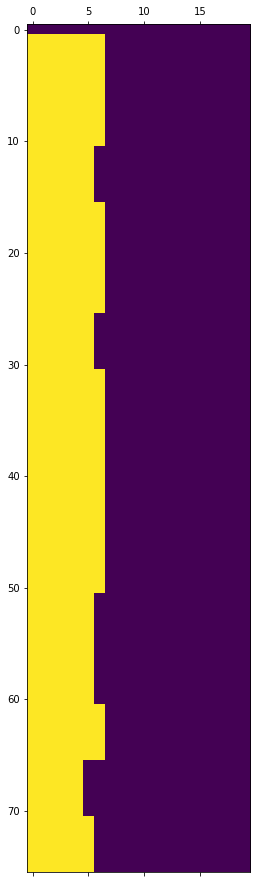

In [238]:
a = np.isnan(scores_total)
plt.matshow(a[624:700,:]*1)


In [241]:
df_dataset.iloc[624]

openmlid                6
learner        SVC_linear
size_train             64
size_test            2000
outer_seed              1
inner_seed              6
score_train           1.0
score_valid        0.2961
score_test          0.284
Name: 624, dtype: object

In [243]:
df_extrapolations.query('openmlid == 6')

,openmlid,learner,outer_seed,inner_seed,max_anchor_seen,prediction,curve_model,beta


In [197]:
sizes_consistent_int
offset_right
offset_left
len(sizes_consistent_int)

20

In [199]:
offset_left

5

In [198]:
sizes

array([   91,   181,   256,   362,   512,   724,  1024,  1448,  2048,
        2896,  4096,  5793,  8192, 16200], dtype=int64)

In [177]:
sizes_consistent_int

[16,
 23,
 32,
 45,
 64,
 91,
 128,
 181,
 256,
 362,
 512,
 724,
 1024,
 1448,
 2048,
 2896,
 4096,
 5793,
 8192,
 16200]

In [ ]:
rows = []
i = 0
#for openmlid, df_dataset in df.groupby("openmlid"):
openmlid = 6
df_dataset = df.query("openmlid==6")
print('dataset %d' % openmlid)
size_list = dict()
for learner, df_learner in df_dataset.groupby("learner"):
    for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
        sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
        for size in sizes:
            size_str = str(size)
            if size_str in size_list.keys():
                size_list[size_str] = size_list[size_str]+1
            else:
                size_list[size_str] = 1

size_list

In [118]:
size_list

{'16': 2375,
 '23': 2375,
 '32': 2375,
 '45': 2375,
 '64': 2375,
 '91': 2390,
 '128': 2430,
 '181': 2495,
 '256': 2500,
 '362': 2500,
 '512': 2500,
 '724': 2500,
 '1024': 2500,
 '1448': 2500,
 '2048': 2500,
 '2896': 2500,
 '4096': 2500,
 '5793': 2500,
 '8192': 2500,
 '16200': 2500}

In [95]:
average_curves(df_small)

  0%|          | 0/2500 [00:00<?, ?it/s]

new dataset
0 0
[ 16  23  32  45  64  91 128 181 256 505]
0 1
[ 16  23  32  45  64  91 128 181 256 505]
0 2
[ 16  23  32  45  64  91 128 181 256 505]
0 3
[ 16  23  32  45  64  91 128 181 256 505]
0 4
[ 16  23  32  45  64  91 128 181 256 505]
1 0
[ 16  23  32  45  64  91 128 181 256 505]
1 1
[ 16  23  32  45  64  91 128 181 256 505]
1 2
[ 16  23  32  45  64  91 128 181 256 505]
1 3
[ 16  23  32  45  64  91 128 181 256 505]
1 4
[ 16  23  32  45  64  91 128 181 256 505]
2 0
[ 16  23  32  45  64  91 128 181 256 505]
2 1
[ 16  23  32  45  64  91 128 181 256 505]
2 2
[ 16  23  32  45  64  91 128 181 256 505]
2 3
[ 16  23  32  45  64  91 128 181 256 505]
2 4
[ 16  23  32  45  64  91 128 181 256 505]
3 0
[ 16  23  32  45  64  91 128 181 256 505]
3 1
[ 16  23  32  45  64  91 128 181 256 505]
3 2
[ 16  23  32  45  64  91 128 181 256 505]
3 3
[ 16  23  32  45  64  91 128 181 256 505]
3 4
[ 16  23  32  45  64  91 128 181 256 505]
4 0
[ 16  23  32  45  64  91 128 181 256 505]
4 1
[ 16  23  32  45  

0 0
[ 16  23  32  45  64  91 128 181 256 505]
0 1
[ 16  23  32  45  64  91 128 181 256 505]
0 2
[ 16  23  32  45  64  91 128 181 256 505]
0 3
[ 16  23  32  45  64  91 128 181 256 505]
0 4
[ 16  23  32  45  64  91 128 181 256 505]
1 0
[ 16  23  32  45  64  91 128 181 256 505]
1 1
[ 16  23  32  45  64  91 128 181 256 505]
1 2
[ 16  23  32  45  64  91 128 181 256 505]
1 3
[ 16  23  32  45  64  91 128 181 256 505]
1 4
[ 16  23  32  45  64  91 128 181 256 505]
2 0
[ 16  23  32  45  64  91 128 181 256 505]
2 1
[ 16  23  32  45  64  91 128 181 256 505]
2 2
[ 16  23  32  45  64  91 128 181 256 505]
2 3
[ 16  23  32  45  64  91 128 181 256 505]
2 4
[ 16  23  32  45  64  91 128 181 256 505]
3 0
[ 16  23  32  45  64  91 128 181 256 505]
3 1
[ 16  23  32  45  64  91 128 181 256 505]
3 2
[ 16  23  32  45  64  91 128 181 256 505]
3 3
[ 16  23  32  45  64  91 128 181 256 505]
3 4
[ 16  23  32  45  64  91 128 181 256 505]
4 0
[ 16  23  32  45  64  91 128 181 256 505]
4 1
[ 16  23  32  45  64  91 128 1

0 0
[ 16  23  32  45  64  91 128 181 256 505]
0 1
[ 16  23  32  45  64  91 128 181 256 505]
0 2
[ 16  23  32  45  64  91 128 181 256 505]
0 3
[ 16  23  32  45  64  91 128 181 256 505]
0 4
[ 16  23  32  45  64  91 128 181 256 505]
1 0
[ 16  23  32  45  64  91 128 181 256 505]
1 1
[ 16  23  32  45  64  91 128 181 256 505]
1 2
[ 16  23  32  45  64  91 128 181 256 505]
1 3
[ 16  23  32  45  64  91 128 181 256 505]
1 4
[ 16  23  32  45  64  91 128 181 256 505]
2 0
[ 16  23  32  45  64  91 128 181 256 505]
2 1
[ 16  23  32  45  64  91 128 181 256 505]
2 2
[ 16  23  32  45  64  91 128 181 256 505]
2 3
[ 16  23  32  45  64  91 128 181 256 505]
2 4
[ 16  23  32  45  64  91 128 181 256 505]
3 0
[ 16  23  32  45  64  91 128 181 256 505]
3 1
[ 16  23  32  45  64  91 128 181 256 505]
3 2
[ 16  23  32  45  64  91 128 181 256 505]
3 3
[ 16  23  32  45  64  91 128 181 256 505]
3 4
[ 16  23  32  45  64  91 128 181 256 505]
4 0
[ 16  23  32  45  64  91 128 181 256 505]
4 1
[ 16  23  32  45  64  91 128 1

In [32]:


model_names    = ['pow3', 'pow2', 'log2', 'exp2', 'exp3', 'lin2', 'baseline_last_constant']
popular_models = [get_ipl, get_ipl_no_bias, get_log2, get_exp2, get_exp3, get_lin2, get_constant]
assert(len(model_names) == len(popular_models))

def get_multiple_extrapolations(df):
    rows = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25 * 5)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                for i in range(0,len(model_names)):
                    extrapolation_fun = popular_models[i]
                    for offset in range(4, len(sizes)):
                        beta, model = extrapolation_fun(sizes[:offset], scores[:offset])
                        predictions = np.round(model(sizes), 4)
                        assert(len(predictions) == len(sizes))
                        rows.append([openmlid, learner, outer, inner, sizes[offset - 1], predictions, model_names[i], beta])
                pbar.update(1)
    pbar.close()
    return pd.DataFrame(rows, columns=["openmlid", "learner", "outer_seed", "inner_seed", "max_anchor_seen", "prediction", "curve_model", "beta"])

def get_anchors_and_scores(df):
    rows = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25 * 5)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                rows.append([openmlid, learner, outer, inner, sizes, scores])
                pbar.update(1)
    pbar.close()
    return pd.DataFrame(rows, columns=["openmlid", "learner", "outer_seed", "inner_seed", "anchor_prediction", "score"])


In [37]:



def metrics_per_row(row, score, anchor_prediction):
    
    max_anchor_seen = row.max_anchor_seen
    prediction = row.prediction
    max_anchor = np.max(anchor_prediction)
    percentage_train = np.round(max_anchor_seen/max_anchor*100)/100

    trn_ind = np.argwhere(max_anchor_seen == anchor_prediction)[0][0] # recover offset
    trn_indices = range(0,(trn_ind+1))
    tst_indices = range(trn_ind+1,len(anchor_prediction))
    n_trn = len(trn_indices)
    
    y_trn_hat = prediction[trn_indices]
    y_trn = score[trn_indices]
    y_tst_hat = prediction[tst_indices]
    y_tst = score[tst_indices]

    MSE_trn = sklearn.metrics.mean_squared_error([y_trn], [y_trn_hat])
    MSE_tst = sklearn.metrics.mean_squared_error([y_tst], [y_tst_hat])
    MSE_tst_last = sklearn.metrics.mean_squared_error([y_tst[-1]],[y_tst_hat[-1]])
    L1_trn = sklearn.metrics.mean_absolute_error([y_trn], [y_trn_hat])
    L1_tst = sklearn.metrics.mean_absolute_error([y_tst], [y_tst_hat])
    L1_tst_last = sklearn.metrics.mean_absolute_error([y_tst[-1]],[y_tst_hat[-1]])
    
    return [MSE_trn,MSE_tst,MSE_tst_last,L1_trn,L1_tst,L1_tst_last,max_anchor_seen,percentage_train,n_trn,row.curve_model]

In [29]:
def get_info(df_info, openmlid, learner, outer_seed, inner_seed):
    q = df_info.query('openmlid==@openmlid and learner==@learner and outer_seed==@outer_seed and inner_seed == @inner_seed')
    q = q.iloc[0,:]
    return [q.anchor_prediction, q.score]

In [268]:
row



True

In [271]:
def df_compute_metrics(df,df_info):
    pbar = tqdm(total=len(df))
    rows_metrics = []
    for i in range(0,len(df)):
        row = df.iloc[i,:]
        if 'outer_seed' in row.keys():
            outer_seed = row.outer_seed
        else:
            outer_seed = 0
        if 'inner_seed' in row.keys():
            inner_seed = row.inner_seed
        else:
            inner_seed = 0
        anchor_prediction, score = get_info(df_info, row.openmlid, row.learner, outer_seed, inner_seed)
        rows_metrics.append(metrics_per_row(row,score,anchor_prediction))
        pbar.update(1)
    pbar.close()
    df_metrics = pd.DataFrame(rows_metrics,columns=['MSE trn','MSE tst','MSE tst last','L1 trn','L1 tst','L1 tst last','max anchor seen','percentage','n','curve_model'])
    return df_metrics

In [261]:
df = pd.read_csv("lcdb.csv")
df_small = df[df['openmlid'] == 11]
print('computing extrapolations...')
df_extrapolations = get_multiple_extrapolations_mean_curve(df_small)
print('computing anchors and scores...')
df_anchors_and_scores = get_anchors_and_scores(df_small)


computing extrapolations...


  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp
C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in double_scalars
C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


Skipping sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis


C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


computing anchors and scores...


  0%|          | 0/2500 [00:00<?, ?it/s]

In [272]:
print('computing metrics....')
df_metrics = df_compute_metrics(df_extrapolations,df_anchors_and_scores)

computing metrics....


  0%|          | 0/798 [00:00<?, ?it/s]

# Cleaning the data and processing

In [273]:
print('some strange values:')
print(df_metrics.isin([np.nan, np.inf, -np.inf]).sum())
df_metrics_na = df_metrics.replace([np.inf, -np.inf], np.nan)


some strange values:
MSE trn            0
MSE tst            0
MSE tst last       0
L1 trn             0
L1 tst             0
L1 tst last        0
max anchor seen    0
percentage         0
n                  0
curve_model        0
dtype: int64


In [274]:
df_extrapolations_no_curve_model = df_extrapolations.loc[:, df_extrapolations.columns != 'curve_model']
df_total = pd.concat([df_extrapolations_no_curve_model,df_metrics_na],axis=1)
df_total

,openmlid,learner,max_anchor_seen,prediction,beta,MSE trn,MSE tst,MSE tst last,L1 trn,L1 tst,L1 tst last,max anchor seen,percentage,n,curve_model
0,11,SVC_linear,45,"[0.8156, 0.8445, 0.856, 0.8613, 0.8638, 0.8648...","(0.8656274024222982, 35.8571101348679, 2.37107...",0.001613,0.000454,0.000552,0.024800,0.020083,0.0235,45,0.09,4,pow3
1,11,SVC_linear,64,"[0.8157, 0.8443, 0.856, 0.8616, 0.8642, 0.8653...","(0.8662253219322855, 30.366008072700684, 2.307...",0.001299,0.000566,0.000581,0.020880,0.023780,0.0241,64,0.13,5,pow3
2,11,SVC_linear,91,"[0.8156, 0.8443, 0.856, 0.8616, 0.8642, 0.8653...","(0.866220983922121, 30.40351700718664, 2.30792...",0.001170,0.000572,0.000581,0.021250,0.023925,0.0241,91,0.18,6,pow3
3,11,SVC_linear,128,"[0.8156, 0.8443, 0.856, 0.8616, 0.8642, 0.8653...","(0.8662195343929074, 30.416578140895297, 2.308...",0.001083,0.000576,0.000581,0.021600,0.024000,0.0241,128,0.25,7,pow3
4,11,SVC_linear,181,"[0.8156, 0.8444, 0.856, 0.8615, 0.864, 0.8651,...","(0.8659982201260854, 32.60429565051816, 2.3343...",0.001015,0.000569,0.000571,0.021763,0.023850,0.0239,181,0.36,8,pow3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,11,sklearn.tree.ExtraTreeClassifier,64,"[0.6898, 0.6898, 0.6898, 0.6898, 0.6898, 0.689...",0.689822,0.003591,0.007028,0.009940,0.038440,0.068120,0.0997,64,0.13,5,baseline_last_constant
794,11,sklearn.tree.ExtraTreeClassifier,91,"[0.7061, 0.7061, 0.7061, 0.7061, 0.7061, 0.706...",0.706109,0.006278,0.002831,0.006956,0.059933,0.039450,0.0834,91,0.18,6,baseline_last_constant
795,11,sklearn.tree.ExtraTreeClassifier,128,"[0.7133, 0.7133, 0.7133, 0.7133, 0.7133, 0.713...",0.713262,0.006114,0.002024,0.005806,0.061800,0.033067,0.0762,128,0.25,7,baseline_last_constant
796,11,sklearn.tree.ExtraTreeClassifier,181,"[0.7316, 0.7316, 0.7316, 0.7316, 0.7316, 0.731...",0.731649,0.006123,0.002120,0.003352,0.063163,0.043850,0.0579,181,0.36,8,baseline_last_constant


In [275]:
df_total.describe()

,openmlid,max_anchor_seen,MSE trn,MSE tst,MSE tst last,L1 trn,L1 tst,L1 tst last,max anchor seen,percentage,n
count,798.0,798.000000,798.000000,7.980000e+02,7.980000e+02,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,11.0,127.500000,0.002371,4.534219e+03,1.360263e+04,0.034302,1.473090,4.323076,127.500000,0.253333,6.500000
std,0.0,72.554669,0.002099,1.280853e+05,3.842535e+05,0.016808,38.976385,116.623270,72.554669,0.144158,1.708896
min,11.0,45.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,45.000000,0.090000,4.000000
25%,11.0,64.000000,0.000780,9.236953e-04,4.928400e-04,0.023887,0.028267,0.022200,64.000000,0.130000,5.000000
50%,11.0,109.500000,0.001879,3.147668e-03,4.509125e-03,0.033068,0.050925,0.067150,109.500000,0.215000,6.500000
75%,11.0,181.000000,0.003430,1.761707e-02,3.027603e-02,0.043372,0.115694,0.174000,181.000000,0.360000,8.000000
max,11.0,256.000000,0.017007,3.618269e+06,1.085474e+07,0.115600,1101.128000,3294.652900,256.000000,0.510000,9.000000


In [276]:
df_total.isin([np.nan, np.inf, -np.inf]).sum()

openmlid           0
learner            0
max_anchor_seen    0
prediction         0
beta               0
MSE trn            0
MSE tst            0
MSE tst last       0
L1 trn             0
L1 tst             0
L1 tst last        0
max anchor seen    0
percentage         0
n                  0
curve_model        0
dtype: int64

In [277]:
df_total_clean = df_total.dropna(axis=0)


In [278]:
df_total_clean.describe()

,openmlid,max_anchor_seen,MSE trn,MSE tst,MSE tst last,L1 trn,L1 tst,L1 tst last,max anchor seen,percentage,n
count,798.0,798.000000,798.000000,7.980000e+02,7.980000e+02,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,11.0,127.500000,0.002371,4.534219e+03,1.360263e+04,0.034302,1.473090,4.323076,127.500000,0.253333,6.500000
std,0.0,72.554669,0.002099,1.280853e+05,3.842535e+05,0.016808,38.976385,116.623270,72.554669,0.144158,1.708896
min,11.0,45.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,45.000000,0.090000,4.000000
25%,11.0,64.000000,0.000780,9.236953e-04,4.928400e-04,0.023887,0.028267,0.022200,64.000000,0.130000,5.000000
50%,11.0,109.500000,0.001879,3.147668e-03,4.509125e-03,0.033068,0.050925,0.067150,109.500000,0.215000,6.500000
75%,11.0,181.000000,0.003430,1.761707e-02,3.027603e-02,0.043372,0.115694,0.174000,181.000000,0.360000,8.000000
max,11.0,256.000000,0.017007,3.618269e+06,1.085474e+07,0.115600,1101.128000,3294.652900,256.000000,0.510000,9.000000


# Learning curve of a learning curve

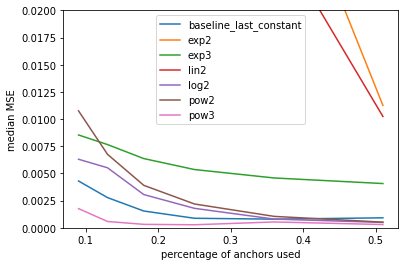

In [279]:
selected = df_total_clean

for curve_model, df_curve_model in selected.groupby("curve_model"):

    Y = df_curve_model.groupby('percentage')['MSE tst last'].median()
    Y_sigma = df_curve_model.groupby('percentage')['MSE tst last'].std()
    X = df_curve_model.groupby('percentage')['MSE tst last'].median().index

    plt.plot(X,Y,label=curve_model)
    
plt.xlabel('percentage of anchors used')
plt.ylabel('median MSE')
plt.legend()
plt.ylim([0,0.02])
plt.show()


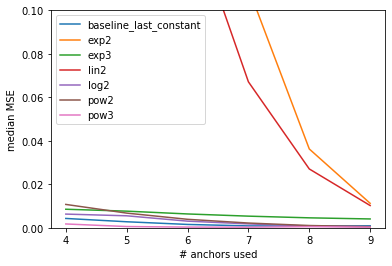

In [281]:
selected = df_total_clean

for curve_model, df_curve_model in selected.groupby("curve_model"):

    Y = df_curve_model.groupby('n')['MSE tst last'].median()
    Y_sigma = df_curve_model.groupby('n')['MSE tst last'].std()
    X = df_curve_model.groupby('n')['MSE tst last'].median().index

    plt.plot(X,Y,label=curve_model)
    
plt.xlabel('# anchors used')
plt.ylabel('median MSE')
plt.legend()
plt.ylim([0,0.1])
plt.show()


In [282]:
df_total_clean.groupby('curve_model')['MSE tst last'].median()

curve_model
baseline_last_constant    0.001460
exp2                      0.135425
exp3                      0.005380
lin2                      0.084972
log2                      0.001954
pow2                      0.003047
pow3                      0.000562
Name: MSE tst last, dtype: float64

In [53]:
df_total_clean['learner']

0                               SVC_linear
1                               SVC_linear
2                               SVC_linear
3                               SVC_linear
4                               SVC_linear
                        ...               
104050    sklearn.tree.ExtraTreeClassifier
104051    sklearn.tree.ExtraTreeClassifier
104052    sklearn.tree.ExtraTreeClassifier
104053    sklearn.tree.ExtraTreeClassifier
104054    sklearn.tree.ExtraTreeClassifier
Name: learner, Length: 104054, dtype: object

In [54]:
df_total_clean.groupby('learner')['MSE tst last'].median()

learner
SVC_linear                                                     0.001347
SVC_poly                                                       0.022605
SVC_rbf                                                        0.007569
SVC_sigmoid                                                    0.045646
sklearn.discriminant_analysis.LinearDiscriminantAnalysis       0.003758
sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis    0.024775
sklearn.ensemble.ExtraTreesClassifier                          0.007208
sklearn.ensemble.GradientBoostingClassifier                    0.015939
sklearn.ensemble.RandomForestClassifier                        0.007285
sklearn.linear_model.LogisticRegression                        0.002783
sklearn.linear_model.PassiveAggressiveClassifier               0.003416
sklearn.linear_model.Perceptron                                0.004914
sklearn.linear_model.RidgeClassifier                           0.001989
sklearn.linear_model.SGDClassifier                      

In [149]:
df_total_clean.describe()

,openmlid,outer_seed,inner_seed,max_anchor_seen,MSE_trn,MSE tst,MSE tst last,L1 trn,L1 tst,L1 tst last,max anchor seen,percentage,n
count,104054.0,104054.000000,104054.000000,104054.000000,104054.000000,1.040540e+05,1.040540e+05,104054.000000,1.040540e+05,1.040540e+05,104054.000000,104054.000000,104054.000000
mean,11.0,2.000000,11.983182,128.140052,0.004220,8.225286e+17,4.935171e+18,0.034750,1.604604e+06,9.624804e+06,128.140052,0.254596,6.482365
std,0.0,1.414227,7.207840,72.502283,0.031484,2.441333e+20,1.464800e+21,0.046719,3.703394e+08,2.221514e+09,72.502283,0.144064,1.703789
min,11.0,0.000000,0.000000,45.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,45.000000,0.090000,4.000000
25%,11.0,1.000000,6.000000,64.000000,0.000268,8.526400e-04,6.916900e-04,0.014288,2.620000e-02,2.630000e-02,64.000000,0.130000,5.000000
50%,11.0,2.000000,12.000000,128.000000,0.000898,4.548589e-03,6.225210e-03,0.026275,6.050000e-02,7.890000e-02,128.000000,0.250000,6.000000
75%,11.0,3.000000,18.000000,181.000000,0.002512,2.245203e-02,4.297329e-02,0.043380,1.327650e-01,2.073000e-01,181.000000,0.360000,8.000000
max,11.0,4.000000,24.000000,256.000000,0.899012,7.859923e+22,4.715954e+23,0.947350,1.144804e+11,6.867280e+11,256.000000,0.510000,9.000000


# Look at parameter values

In [283]:
df_total_clean = df_total_clean.rename(columns={'MSE trn': 'MSE_trn'})

In [284]:
num_curve_models = df_total_clean['curve_model'].unique()
num_curve_models

array(['pow3', 'pow2', 'log2', 'exp2', 'exp3', 'lin2',
       'baseline_last_constant'], dtype=object)

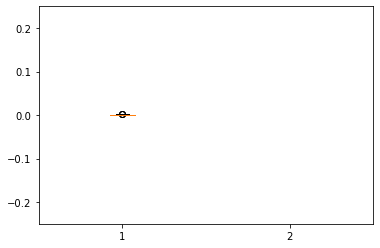

In [285]:
plt.figure()
j = 0
df_selected = df_total_clean.query('curve_model == "lin2"')
for curve_model, df_dataset in df_selected.groupby("curve_model"):
    beta_list = []
    for i in range(0,len(df_dataset)):
        row = df_dataset.iloc[i,:]
        beta = row.beta
        beta_list.append(beta)

    a = np.array(beta_list)
    plt.boxplot(a)
    plt.ylim([-0.25,0.25])


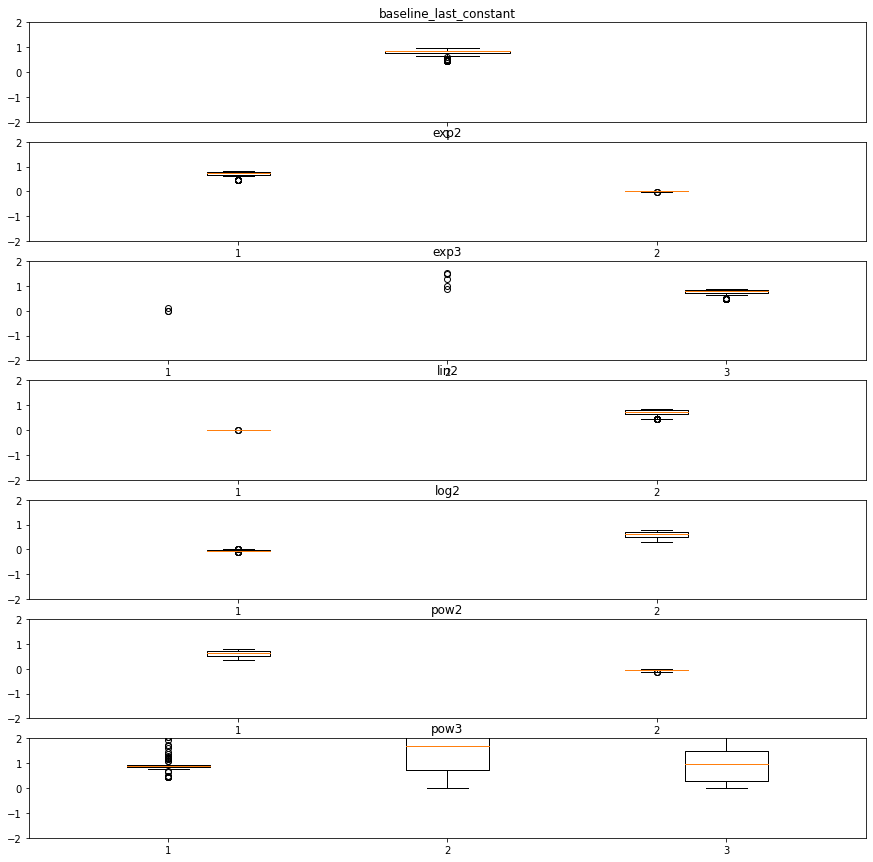

In [286]:
df_total_clean

#df_selected = df_total_clean.query('curve_model == "lin2" and MSE_trn < 0.05')
#df_selected = df_total_clean.query('curve_model == "lin2"')
df_selected = df_total_clean

fig, axs = plt.subplots(len(num_curve_models),figsize=(15,15))
j = 0
for curve_model, df_dataset in df_selected.groupby("curve_model"):
    beta_list = []
    for i in range(0,len(df_dataset)):
        row = df_dataset.iloc[i,:]
        beta = row.beta
        beta_list.append(beta)

    a = np.array(beta_list)
    axs[j].boxplot(a)
    axs[j].set_ylim([-2,2])
    axs[j].set_title(curve_model)
    j = j+1

# Visualize fits

In [287]:
outer_seed = 1
inner_seed = 5
learner = 'SVC_linear'
openmlid = 11
n = 9
df_selected = df_total_clean.query('openmlid==@openmlid and learner==@learner and outer_seed==@outer_seed and inner_seed == @inner_seed and n==@n')
df_selected

[X, Y] = get_info(df_anchors_and_scores, openmlid, learner, outer_seed, inner_seed)

plt.figure()
plt.plot(X,Y,'*')
for i in range(0,len(df_selected)):
    row = df_selected.iloc[i,:]
    Y_hat = row.prediction
    plt.plot(X,Y_hat,'-',label=row.curve_model)
    
plt.ylim([np.min(Y),np.max(Y)])
plt.xlabel('train samples')
plt.ylabel('MSE')
plt.show()

UndefinedVariableError: name 'outer_seed' is not defined

In [70]:
row

'openmlid'

# Learner influence

(0.0, 0.1)

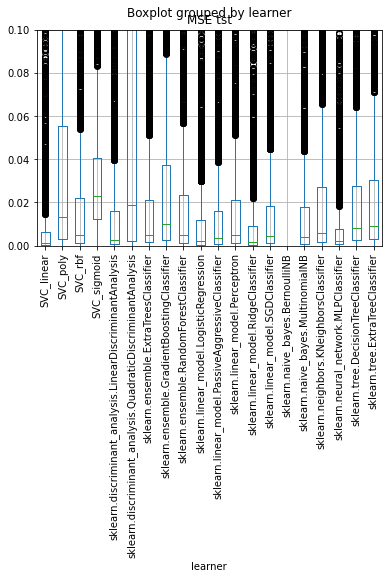

In [59]:
df_total_clean.boxplot(column='MSE tst',by='learner',rot=90)
plt.ylim([0,0.1])

# Curve model influence

(0.0, 0.1)

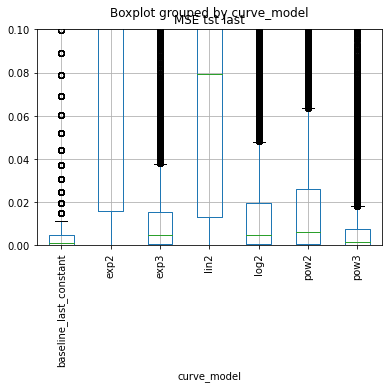

In [56]:
df_total_clean.boxplot(column='MSE tst last',by='curve_model',rot=90)
plt.ylim([0,0.1])